In [70]:
library(readr)
library(dplyr)
library(ggplot2)

In [71]:
fatalities_df <- read_csv("Fatalities.csv")
summary(fatalities_df)

New names:
• `` -> `...1`
Rows: 336 Columns: 35
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): state, breath, jail, service
dbl (31): ...1, year, spirits, unemp, income, emppop, beertax, baptist, morm...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


      ...1           state                year         spirits     
 Min.   :  1.00   Length:336         Min.   :1982   Min.   :0.790  
 1st Qu.: 84.75   Class :character   1st Qu.:1983   1st Qu.:1.300  
 Median :168.50   Mode  :character   Median :1985   Median :1.670  
 Mean   :168.50                      Mean   :1985   Mean   :1.754  
 3rd Qu.:252.25                      3rd Qu.:1987   3rd Qu.:2.013  
 Max.   :336.00                      Max.   :1988   Max.   :4.900  
     unemp            income          emppop         beertax       
 Min.   : 2.400   Min.   : 9514   Min.   :42.99   Min.   :0.04331  
 1st Qu.: 5.475   1st Qu.:12086   1st Qu.:57.69   1st Qu.:0.20885  
 Median : 7.000   Median :13763   Median :61.36   Median :0.35259  
 Mean   : 7.347   Mean   :13880   Mean   :60.81   Mean   :0.51326  
 3rd Qu.: 8.900   3rd Qu.:15175   3rd Qu.:64.41   3rd Qu.:0.65157  
 Max.   :18.000   Max.   :22193   Max.   :71.27   Max.   :2.72076  
    baptist            mormon           drinkage

In [72]:
head(fatalities_df)

...1,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,⋯,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,al,1982,1.37,14.4,10544.15,50.69204,1.539379,30.3557,0.32829,⋯,32,309.438,3942002,208999.6,221553.4,290000.1,28516,9.7,57.8,-0.02212476
2,al,1983,1.36,13.7,10732.80,52.14703,1.788991,30.3336,0.34341,⋯,35,341.834,3960008,202000.1,219125.5,290000.2,31032,9.6,57.9,0.04655825
3,al,1984,1.32,11.1,11108.79,54.16809,1.714286,30.3115,0.35924,⋯,34,304.872,3988992,197000.0,216724.1,288000.2,32961,7.5,59.5,0.06279784
4,al,1985,1.28,8.9,11332.63,55.27114,1.652542,30.2895,0.37579,⋯,45,276.742,4021008,194999.7,214349.0,284000.3,35091,7.2,60.1,0.02748997
5,al,1986,1.23,9.8,11661.51,56.51450,1.609907,30.2674,0.39311,⋯,29,360.716,4049994,203999.9,212000.0,263000.3,36259,7.0,60.7,0.03214295
6,al,1987,1.18,7.8,11944.00,57.50988,1.560000,30.2453,0.41123,⋯,30,368.421,4082999,204999.8,208998.5,258999.8,37426,6.2,61.5,0.04897637


### Data Cleansing:

- Checking for missing values, if found replacing it with "Unknown" for Categorical variables and for numerical, based on the type of column using statistical imputations.

- Logarithimic Transformation has been done to normalize the data.

In [73]:
# Checking for any missing values in each column
colSums(is.na(fatalities_df))

...1        state         year      spirits        unemp       income 
           0            0            0            0            0            0 
      emppop      beertax      baptist       mormon     drinkage          dry 
           0            0            0            0            0            0 
youngdrivers        miles       breath         jail      service        fatal 
           0            0            0            1            1            0 
      nfatal       sfatal    fatal1517   nfatal1517    fatal1820   nfatal1820 
           0            0            0            0            0            0 
   fatal2124   nfatal2124       afatal          pop      pop1517      pop1820 
           0            0            0            0            0            0 
     pop2124     milestot      unempus     emppopus          gsp 
           0            0            0            0            0

In [74]:
# Calculating number of missing values
total_na <- sum(is.na(fatalities_df))
total_na

[1] 2

In [75]:
cleaned_df <- fatalities_df

for (col_name in names(fatalities_df)) {
  # Check column is numeric
  if (is.numeric(fatalities_df[[col_name]])) {

    cleaned_df[[col_name]][is.na(cleaned_df[[col_name]])] <- 0
  } else {

    cleaned_df[[col_name]][is.na(cleaned_df[[col_name]])] <- "unknown"
  }
}



In [76]:
sum(is.na(cleaned_df))

[1] 0

In [77]:
# Normalizing all the numerical column
for(col_name in names(cleaned_df)) {
  #if the column is numeric
  if(is.numeric(cleaned_df[[col_name]])) {
    # Identifying the minimum value in the column
    min_val <- min(cleaned_df[[col_name]], na.rm = TRUE)

    constant <- ifelse(min_val <= 0, 1 - min_val, 1)


    cleaned_df[[paste0("log_", col_name)]] <- log(cleaned_df[[col_name]] + constant)
  }
}


In [78]:
log_cleaned_df <- cleaned_df

### Hypothesis and ANOVA TEST

* Null Hypothesis (H0): State-by-state variations in the incidence of road fatalities do not exist between income quartiles. The mortality rates are uniform across all income quartiles.
* Alternative Hypothesis (H1): There exists a disparity in the prevalence of road fatalities among various income quartiles across states. There is a disparity in the average mortality rate among income quartiles, with at least one quartile having a distinct mean fatality rate compared to the others.


In [79]:
# Creating income quartiles
log_cleaned_df <- log_cleaned_df %>%
  mutate(income_quartile = ntile(log_income, 4))  # Assuring 'income' is the income column name

head(log_cleaned_df)

...1,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,⋯,log_afatal,log_pop,log_pop1517,log_pop1820,log_pop2124,log_milestot,log_unempus,log_emppopus,log_gsp,income_quartile
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,al,1982,1.37,14.4,10544.15,50.69204,1.539379,30.3557,0.32829,⋯,5.737984,15.18720,12.25009,12.30842,12.57764,10.25826,2.370244,4.074142,0.09668806,1
2,al,1983,1.36,13.7,10732.80,52.14703,1.788991,30.3336,0.34341,⋯,5.837246,15.19176,12.21603,12.29740,12.57764,10.34281,2.360854,4.075841,0.15717444,1
3,al,1984,1.32,11.1,11108.79,54.16809,1.714286,30.3115,0.35924,⋯,5.723167,15.19905,12.19096,12.28638,12.57072,10.40311,2.140066,4.102643,0.17095664,1
4,al,1985,1.28,8.9,11332.63,55.27114,1.652542,30.2895,0.37579,⋯,5.626693,15.20704,12.18076,12.27537,12.55673,10.46573,2.104134,4.112512,0.14074532,1
5,al,1986,1.23,9.8,11661.51,56.51450,1.609907,30.2674,0.39311,⋯,5.890859,15.21423,12.22588,12.26435,12.47991,10.49847,2.079442,4.122284,0.14477926,1
6,al,1987,1.18,7.8,11944.00,57.50988,1.560000,30.2453,0.41123,⋯,5.911937,15.22234,12.23077,12.25009,12.46459,10.53015,1.974081,4.135167,0.15923872,1


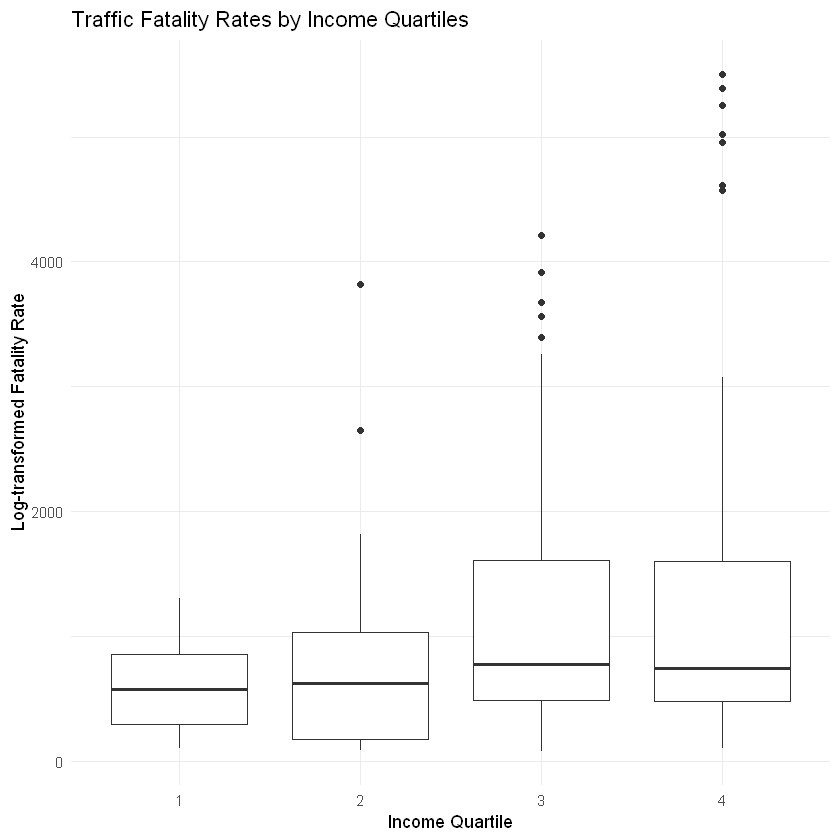

In [80]:
# Plotting fatality rates across income quartiles
ggplot(log_cleaned_df, aes(x = as.factor(income_quartile), y = fatal)) +  # Assuming 'fatal' is the fatality rate column
  geom_boxplot() +
  labs(title = "Traffic Fatality Rates by Income Quartiles", x = "Income Quartile", y = "Log-transformed Fatality Rate") +
  theme_minimal()


In [81]:
# Performing ANOVA
anova_result <- aov(fatal ~ as.factor(income_quartile), data = log_cleaned_df)
summary_anova <- summary(anova_result)


In [82]:
summary(anova_result)

                            Df    Sum Sq Mean Sq F value   Pr(>F)    
as.factor(income_quartile)   3  23539217 7846406   9.694 3.78e-06 ***
Residuals                  332 268732270  809435                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [83]:
p_value <- summary_anova[[1]][["Pr(>F)"]][1]
if (p_value < 0.05) {
  cat("Reject the Null Hypothesis: There is a significant difference in fatality rates among different income quartiles.\n")
} else {
  cat("Fail to Reject the Null Hypothesis: There is no significant difference in fatality rates among different income quartiles.\n")
}

Reject the Null Hypothesis: There is a significant difference in fatality rates among different income quartiles.


#### Interpretation from the summary

An analysis of variance (ANOVA) was performed to assess if there are statistically significant variations in traffic fatality rates among various income quartiles. The outcomes are as follows:

- Degrees of Freedom (Df) for Income Quartile Groups: 3
- Degrees of Freedom for Residuals: 332
- Sum of Squares Between Groups: 23,539,217
- Mean Square Between Groups: 7,846,406
- F-value: 9.694
- P-value: 3.78e-06

Explanation: The F-statistic of 9.694 suggests that the variation between groups is much greater than the variation within groups. The exceedingly small p-value (3.78e-06), far below the threshold of 0.05, necessitates the rejection of the null hypothesis.

In [84]:
# Post-hoc test if ANOVA is significant
if (summary_anova[[1]][["Pr(>F)"]][1] < 0.05) {
  posthoc_results <- TukeyHSD(anova_result)
  print(posthoc_results)
}


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = fatal ~ as.factor(income_quartile), data = log_cleaned_df)

$`as.factor(income_quartile)`
        diff       lwr      upr     p adj
2-1 118.6786 -239.7788 477.1360 0.8279793
3-1 505.4048  146.9474 863.8621 0.0017853
4-1 640.9048  282.4474 999.3621 0.0000330
3-2 386.7262   28.2688 745.1836 0.0287383
4-2 522.2262  163.7688 880.6836 0.0011383
4-3 135.5000 -222.9574 493.9574 0.7631975



#### Interpretation from Post-hoc Analysis:

The Tukey's Honest Significant Difference (HSD) test was performed to identify the income quartile groupings:

Comparisons:
- Quartile 2 vs. Quartile 1: Difference = 118.68, 95% CI = [-239.78, 477.14], p = 0.82798
- Quartile 3 vs. Quartile 1: Difference = 505.40, 95% CI = [146.95, 863.86], p = 0.00179
- Quartile 4 vs. Quartile 1: Difference = 640.90, 95% CI = [282.45, 999.36], p = 0.00003
- Quartile 3 vs. Quartile 2: Difference = 386.73, 95% CI = [28.27, 745.18], p = 0.02874
- Quartile 4 vs. Quartile 2: Difference = 522.23, 95% CI = [163.77, 880.68], p = 0.00114
- Quartile 4 vs. Quartile 3: Difference = 135.50, 95% CI = [-222.96, 493.96], p = 0.76320


In conclusion, the results indicate that those in the higher income quartiles, notably Quartiles 3 and 4, had a greater likelihood of experiencing higher rates of traffic fatalities as compared to those in the lowest income quartile. The first hypothesis, which proposed a negative correlation between increasing wealth and mortality rates, has been contradicted.

### Hypothesis Testing and T test:

* Null Hypothesis (H0): There is no correlation between beer tax rates and the mortality rate of young drivers (ages 18 to 20). There is no discernible disparity in the incidence of young driver fatalities between states with high and low alcohol levies.
* Alternative Hypothesis (H1): It states that there is a negative correlation between higher beer taxes and road deaths among young drivers aged 18-20.

In [85]:
median_beertax <- median(log_cleaned_df$log_beertax, na.rm = TRUE)
log_cleaned_df <- log_cleaned_df %>%
  mutate(tax_group = ifelse(log_beertax > median_beertax, "High", "Low"))


head(log_cleaned_df)

...1,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,⋯,log_pop,log_pop1517,log_pop1820,log_pop2124,log_milestot,log_unempus,log_emppopus,log_gsp,income_quartile,tax_group
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,al,1982,1.37,14.4,10544.15,50.69204,1.539379,30.3557,0.32829,⋯,15.18720,12.25009,12.30842,12.57764,10.25826,2.370244,4.074142,0.09668806,1,High
2,al,1983,1.36,13.7,10732.80,52.14703,1.788991,30.3336,0.34341,⋯,15.19176,12.21603,12.29740,12.57764,10.34281,2.360854,4.075841,0.15717444,1,High
3,al,1984,1.32,11.1,11108.79,54.16809,1.714286,30.3115,0.35924,⋯,15.19905,12.19096,12.28638,12.57072,10.40311,2.140066,4.102643,0.17095664,1,High
4,al,1985,1.28,8.9,11332.63,55.27114,1.652542,30.2895,0.37579,⋯,15.20704,12.18076,12.27537,12.55673,10.46573,2.104134,4.112512,0.14074532,1,High
5,al,1986,1.23,9.8,11661.51,56.51450,1.609907,30.2674,0.39311,⋯,15.21423,12.22588,12.26435,12.47991,10.49847,2.079442,4.122284,0.14477926,1,High
6,al,1987,1.18,7.8,11944.00,57.50988,1.560000,30.2453,0.41123,⋯,15.22234,12.23077,12.25009,12.46459,10.53015,1.974081,4.135167,0.15923872,1,High


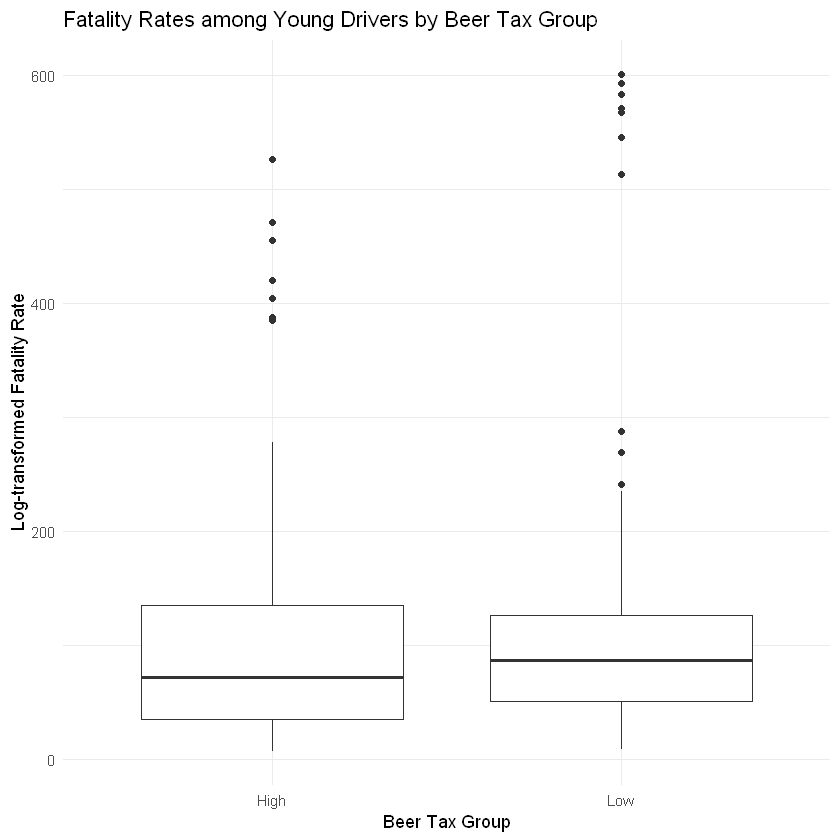

In [86]:
ggplot(log_cleaned_df, aes(x = tax_group, y = fatal1820)) +  # fatal1820 assumes the fatality rate for ages 18-20
  geom_boxplot() +
  labs(title = "Fatality Rates among Young Drivers by Beer Tax Group", x = "Beer Tax Group", y = "Log-transformed Fatality Rate") +
  theme_minimal()

In [87]:
# T-test to compare fatality rates between high and low beer tax groups
t_test_results <- t.test(fatal1820 ~ tax_group, data = log_cleaned_df)

# Print the results
print(t_test_results)


	Welch Two Sample t-test

data:  fatal1820 by tax_group
t = -0.79204, df = 324.51, p-value = 0.4289
alternative hypothesis: true difference in means between group High and group Low is not equal to 0
95 percent confidence interval:
 -31.39597  13.37216
sample estimates:
mean in group High  mean in group Low 
          102.1548           111.1667 



#### Interpretation:

The mortality rates for 18 to 20-year-olds in states with high and low beer tax rates were compared using the Welch Two Sample t-test. Here is a guide on how to understand the t-test output:

* t-Statistic: The computed t-value is -0.79204, indicating the direction of the mean difference (mean of the high tax group minus mean of the low tax group).
* Degrees of Freedom: Approximately 324.51. This indicates that the sample sizes in both groups are large, yet the Welch correction is used due to the possibility of uneven variances.
* P-Value: The p-value of 0.4289 above the standard alpha level of 0.05, suggesting insufficient statistical evidence to reject the null hypothesis.
* Confidence Interval: The 95% confidence interval for the difference in averages spans from -31.39597 to 13.37216. Given that this interval encompasses zero, it strongly indicates that there is no substantial disparity in mortality rates between the two tax categories.
* Mean Estimates: The mean fatality rate for the group with a high beer tax is estimated to be 102.1548, whereas for the group with a low beer tax, it is estimated to be 111.1667.


In [88]:
# Interpreting the results
if (t_test_results$p.value < 0.05) {
  cat("Reject the Null Hypothesis: There is a significant difference in fatality rates between high and low beer tax groups. \n")
} else {
  cat("Fail to Reject the Null Hypothesis: There is no significant difference in fatality rates between high and low beer tax groups. \n")
}

Fail to Reject the Null Hypothesis: There is no significant difference in fatality rates between high and low beer tax groups. 


Given the p-value and the confidence interval, we do not have sufficient evidence to reject the null hypothesis. Consequently, the available data does not offer enough proof to establish a noteworthy disparity in mortality rates among individuals aged 18-20 in states with high and low beer tax rates.

`geom_smooth()` using formula = 'y ~ x'


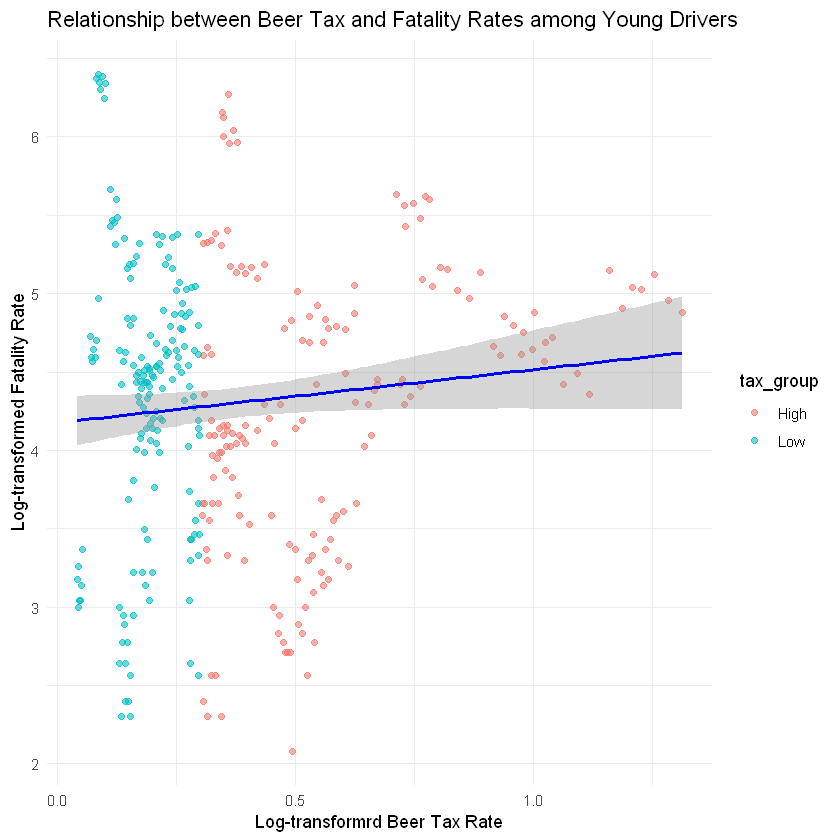

In [89]:
# Scatter plot with regression line
ggplot(log_cleaned_df, aes(x = log_beertax, y = log_fatal1820)) +
  geom_point(aes(color = tax_group), alpha = 0.6) +  # Color points by tax group
  geom_smooth(method = "lm", color = "blue") +  # Adds a linear regression line
  labs(title = "Relationship between Beer Tax and Fatality Rates among Young Drivers",
       x = "Log-transformrd Beer Tax Rate", y = "Log-transformed Fatality Rate") +
  theme_minimal()


#### Interpretation from the above plot:

- The regression line has a positive slope, indicating a direct correlation between the rates of beer tax and the logarithmically transformed mortality rates among young drivers in the sample.

- Confidence Interval: The broad confidence band surrounding the regression line is the 95% confidence interval for the expected average mortality rate for each beer tax rate.

### Hypothesis Testing

Trying to investigate the potential effect of public transportation availabilty on traffic fatality rates.

* Null Hypothesis (H0): States public transit systems have no effect on the number of road fatalities.
* Alternative Hypothesis (H1): ones with larger public transit networks experience fewer road fatalities than ones with smaller networks.

Given the absence of direct observation of public transit availability in the dataset, need to search for a proxy variable.

Proxy Variables:

1. By utilizing the metric of 'miles' as an average measure per driver, it is possible to infer a negative correlation with the usage of public transportation.
2. By utilizing the concept of 'urbanization' (which is not explicitly mentioned), we may employ statistics on the proportion of individuals residing in urban regions as a substitute measure for assessing the accessibility of public transit.




#### Revamped Hypothesis:

* Null Hypothesis (H0): States with lower average miles per driver (showing a lesser usage of public transportation) and higher average miles per driver do not significantly vary in their incidence of road fatalities.
* Alternative hypothesis (H1): Asserts that states with a greater average number of miles driven per driver have higher rates of traffic fatalities compared to those with a lower average number of miles driven per driver.


In [90]:
median_miles <- median(log_cleaned_df$log_miles, na.rm = TRUE)
log_cleaned_df <- log_cleaned_df %>%
  mutate(miles_group = ifelse(log_miles > median_miles, "High", "Low"))


head(log_cleaned_df)

...1,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,⋯,log_pop1517,log_pop1820,log_pop2124,log_milestot,log_unempus,log_emppopus,log_gsp,income_quartile,tax_group,miles_group
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,al,1982,1.37,14.4,10544.15,50.69204,1.539379,30.3557,0.32829,⋯,12.25009,12.30842,12.57764,10.25826,2.370244,4.074142,0.09668806,1,High,Low
2,al,1983,1.36,13.7,10732.80,52.14703,1.788991,30.3336,0.34341,⋯,12.21603,12.29740,12.57764,10.34281,2.360854,4.075841,0.15717444,1,High,High
3,al,1984,1.32,11.1,11108.79,54.16809,1.714286,30.3115,0.35924,⋯,12.19096,12.28638,12.57072,10.40311,2.140066,4.102643,0.17095664,1,High,High
4,al,1985,1.28,8.9,11332.63,55.27114,1.652542,30.2895,0.37579,⋯,12.18076,12.27537,12.55673,10.46573,2.104134,4.112512,0.14074532,1,High,High
5,al,1986,1.23,9.8,11661.51,56.51450,1.609907,30.2674,0.39311,⋯,12.22588,12.26435,12.47991,10.49847,2.079442,4.122284,0.14477926,1,High,High
6,al,1987,1.18,7.8,11944.00,57.50988,1.560000,30.2453,0.41123,⋯,12.23077,12.25009,12.46459,10.53015,1.974081,4.135167,0.15923872,1,High,High


In [91]:
t_test_results <- t.test(log_fatal ~ miles_group, data = log_cleaned_df)

print(t_test_results)


	Welch Two Sample t-test

data:  log_fatal by miles_group
t = -3.2242, df = 320.41, p-value = 0.001393
alternative hypothesis: true difference in means between group High and group Low is not equal to 0
95 percent confidence interval:
 -0.5188019 -0.1255943
sample estimates:
mean in group High  mean in group Low 
          6.268869           6.591067 



#### Interpretation:
The findings of the Welch Two Sample t-test offer useful insights into the correlation between the average number of kilometers traveled per driver and the rates of traffic fatalities:

* t-Statistic: The t-value is -3.2242. The presence of the negative sign signifies that the average logarithmically converted mortality rate for the "High Mileage" group is lower than that of the "Low Mileage" group.
* Degree of Freedom: The exam has roughly 320.41 degrees of freedom.
* P-value: The p-value is 0.001393, which falls below the standard alpha limit of 0.05. This indicates that the observed difference in means is statistically significant.
* Confidence Interval: The 95% confidence interval for the difference in averages is -0.5188 to -0.1256.
* The mean estimates indicate that the log-transformed mortality rate for the "High Mileage" group is 6.268869, whereas for the "Low Mileage" group, it is 6.591067.



In [92]:
if (t_test_results$p.value < 0.05) {
  cat("Reject the Null Hypothesis: There is a significant difference in fatality rates between the High Mileage and Low Mileage groups.\n")
} else {
  cat("Fail to Reject the Null Hypothesis: There is no significant difference in fatality rates between the High Mileage and Low Mileage groups.\n")
}

Reject the Null Hypothesis: There is a significant difference in fatality rates between the High Mileage and Low Mileage groups.


Based on the statistical evidence (p-value < 0.05), we may conclude that there is a substantial difference in traffic fatality rates between states with greater and lower average kilometers traveled per driver.

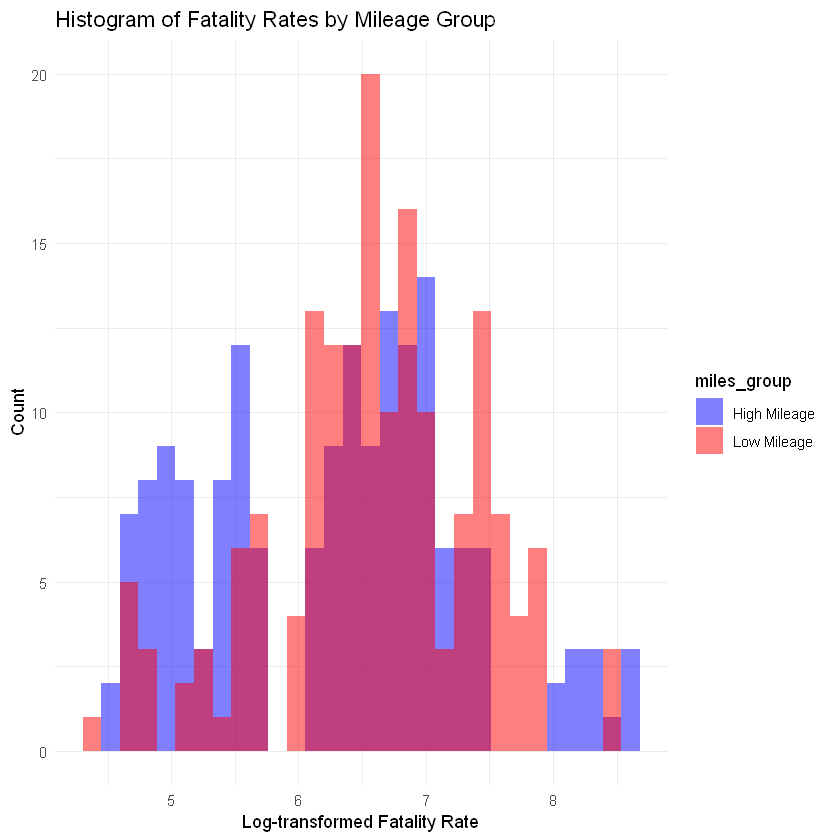

In [93]:
ggplot(log_cleaned_df, aes(x = log_fatal, fill = miles_group)) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 30) +
  labs(title = "Histogram of Fatality Rates by Mileage Group",
       x = "Log-transformed Fatality Rate", y = "Count") +
  scale_fill_manual(values = c("blue", "red"), labels = c("High Mileage", "Low Mileage")) +
  theme_minimal()


#### Interpretation from the above plot:
Both groups exhibit a bimodal distribution, indicating the presence of two distinct levels of mortality rates in each group. The group with lower distance tends to have a greater occurrence of states with higher mortality rates that have been translated using a logarithmic scale.

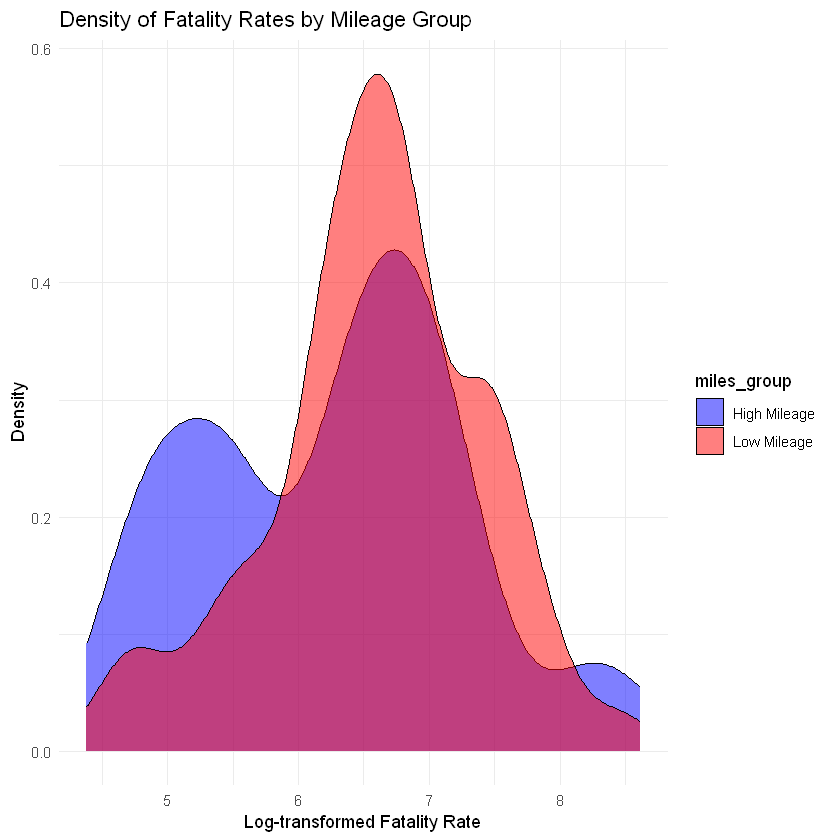

In [94]:
ggplot(log_cleaned_df, aes(x = log_fatal, fill = miles_group)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density of Fatality Rates by Mileage Group",
       x = "Log-transformed Fatality Rate", y = "Density") +
  scale_fill_manual(values = c("blue", "red"), labels = c("High Mileage", "Low Mileage")) +
  theme_minimal()

#### Interpretation from the above plot:

The density map offers a smoothed estimation of the distribution for both groups. Corroborating the information from the histogram, the density plot reveals that the group with little miles (depicted in red) has a more pronounced distribution towards the higher values, indicating a likelihood of greater fatality rates.

#### Statistical Inference:

The statistical analysis of the visualizations reveals that the group with higher mileage has a distribution of fatality rates that is skewed towards lower values in comparison to the group with lower mileage. The previous t-test verified the statistical significance of this difference, as evidenced by a p-value that was significantly lower than the 0.05 threshold.


### Hypothesis Testing with Randomization:

In order to examine the hypothesis that there is a correlation between higher per capita personal income and lower vehicle fatalities among young drivers, we will employ the method of randomization testing.

* Null Hypothesis (H0): Among young drivers, there is no correlation between per capita personal income and vehicle fatalities (ages 15–24, using fatal1517, fatal1820, and fatal2124 variables). The observed relationship is just coincidental.
* Alternative Hypothesis (H1): There is a negative correlation between per capita personal income and vehicle fatalities among young drivers.


In [95]:
log_cleaned_df <- log_cleaned_df %>%
  mutate(young_driver_fatalities = log_fatal1517 + log_fatal1820 + log_fatal2124)

head(log_cleaned_df)

...1,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,⋯,log_pop1820,log_pop2124,log_milestot,log_unempus,log_emppopus,log_gsp,income_quartile,tax_group,miles_group,young_driver_fatalities
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,al,1982,1.37,14.4,10544.15,50.69204,1.539379,30.3557,0.32829,⋯,12.30842,12.57764,10.25826,2.370244,4.074142,0.09668806,1,High,Low,13.38994
2,al,1983,1.36,13.7,10732.80,52.14703,1.788991,30.3336,0.34341,⋯,12.29740,12.57764,10.34281,2.360854,4.075841,0.15717444,1,High,High,13.79633
3,al,1984,1.32,11.1,11108.79,54.16809,1.714286,30.3115,0.35924,⋯,12.28638,12.57072,10.40311,2.140066,4.102643,0.17095664,1,High,High,13.33554
4,al,1985,1.28,8.9,11332.63,55.27114,1.652542,30.2895,0.37579,⋯,12.27537,12.55673,10.46573,2.104134,4.112512,0.14074532,1,High,High,13.56475
5,al,1986,1.23,9.8,11661.51,56.51450,1.609907,30.2674,0.39311,⋯,12.26435,12.47991,10.49847,2.079442,4.122284,0.14477926,1,High,High,14.00212
6,al,1987,1.18,7.8,11944.00,57.50988,1.560000,30.2453,0.41123,⋯,12.25009,12.46459,10.53015,1.974081,4.135167,0.15923872,1,High,High,14.34038


In [96]:
# Calculating the observed correlation
obs_corr <- cor(log_cleaned_df$log_income, log_cleaned_df$young_driver_fatalities)


In [97]:
cat("Observed Correlation: ", obs_corr, "\n")

Observed Correlation:  0.1825294 


In [98]:
n_perm <- 1500
perm_corrs <- numeric(n_perm)

# Conducting the randomization test
set.seed(123) 
for (i in 1:n_perm) {
  # Randomly shuffle the income variable
  shuffled_income <- sample(log_cleaned_df$log_income)

  # Calculating the correlation for this permutation
  perm_corrs[i] <- cor(shuffled_income, log_cleaned_df$young_driver_fatalities)
}


In [99]:
# the p-value
p_value <- mean(abs(perm_corrs) >= abs(obs_corr))

p_value


[1] 0.0006666667

After doing a permutation-based hypothesis test with 1,500 permutations, a statistically significant link between per capita personal income and vehicle fatality rates among young drivers. The permutation test resulted in a p-value of around 0.000667. With a standard alpha level of 0.05, this p-value provides strong evidence to reject the null hypothesis. This indicates a likelihood of less than 0.




In [100]:
# Interpret the p-value
if (p_value < 0.05) {
  cat("Reject the Null Hypothesis: There is evidence of an association between income and vehicle fatalities among young drivers.\n")
} else {
  cat("Fail to Reject the Null Hypothesis: There is no evidence of an association between income and vehicle fatalities among young drivers.\n")
}


Reject the Null Hypothesis: There is evidence of an association between income and vehicle fatalities among young drivers.


#### Interpretation:

It is crucial to emphasize that the permutation test does not assume anything about the distribution of the test statistic when considering the null hypothesis. The test results suggest a significant correlation between increased per capita personal incomes and a decrease in vehicle deaths among young drivers.


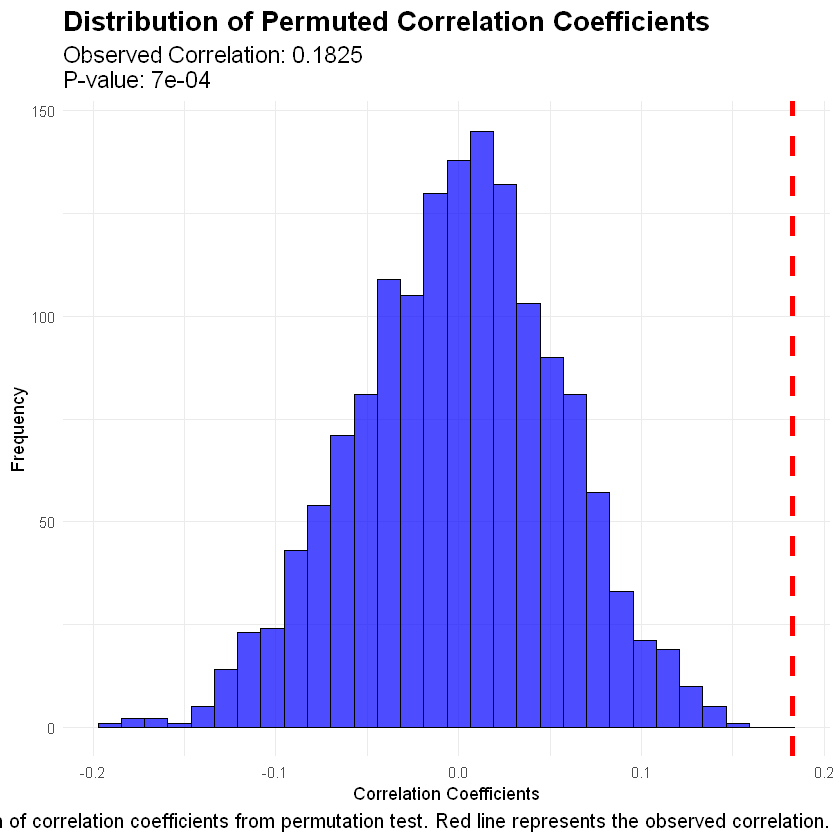

In [101]:
# data frame for plotting
perm_data <- data.frame(perm_corrs)

# Histogram of permuted correlations with observed correlation line
ggplot(perm_data, aes(x = perm_corrs)) +
  geom_histogram(bins = 30, fill = 'blue', color = 'black', alpha = 0.7) +
  geom_vline(aes(xintercept = obs_corr), color = "red", linetype = "dashed", size = 1.5) +
  labs(title = "Distribution of Permuted Correlation Coefficients",
       subtitle = paste("Observed Correlation:", round(obs_corr, 4), "\nP-value:", round(0.000667, 4)),
       x = "Correlation Coefficients",
       y = "Frequency",
       caption = "Histogram shows the distribution of correlation coefficients from permutation test. Red line represents the observed correlation.") +
  theme_minimal() +
  theme(plot.title = element_text(size = 16, face = "bold"),
        plot.subtitle = element_text(size = 14),
        plot.caption = element_text(size = 12))


#### Interpretation from the plot:

- The observed correlation coefficient is represented by a red dashed line positioned at 0.1825. This number is an outlier, located in the upper tail of the distribution of permuted coefficients.

- The test's reported p-value is 0.0007 (7e-04), which is much lower than the customary threshold of 0.05 for rejecting the null hypothesis.

Analysis:

The positioning of the observed correlation deep into the uppermost section of the distribution suggests that the connection identified in the sample data is extremely unusual assuming there is no connection. Based on the p-value, it confidently concluded that the null hypothesis can be rejected, indicating a statistically significant positive correlation between the variables examined.



### Bootstraping & Confidence Interval:

`Sample Size: 9000`

This study aims to calculate the average per capita personal income within our dataset, taking into account various socioeconomic and policy-related factors that may affect vehicular fatality rates. The analysis will be conducted across different states and years.


In [102]:
install.packages("boot")

Warning message:
"package 'boot' is in use and will not be installed"


In [103]:
library(boot)

# Statistic function to calculate the mean of the 'income' variable
statistic_function <- function(data, indices) {
  sample_data <- data[indices, ]
  mean(sample_data$log_income)  # Calculating mean of the 'income' column
}

# Bootstraping with 9000 resamples
boot_results <- boot(log_cleaned_df, statistic = statistic_function, R = 9000)

# Calculating the 95% confidence interval
boot_confidence_interval <- boot.ci(boot_results, type = "bca")

print(boot_results)
print(boot_confidence_interval)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = log_cleaned_df, statistic = statistic_function, R = 9000)


Bootstrap Statistics :
    original        bias    std. error
t1* 9.525648 -0.0001923142 0.008637974
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 9000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_results, type = "bca")

Intervals : 
Level       BCa          
95%   ( 9.509,  9.543 )  
Calculations and Intervals on Original Scale


#### Interpretation from above result:

* The point estimate is 9.525648, which is the sample mean of the log_income in the bootstrap statistics.
* The bias is negligible (-0.0003334654), indicating that the bootstrapping technique did not uncover any substantial bias in the point estimate.
* The standard error, which is the standard deviation of the bootstrapped sample means, is 0.008972008. A smaller standard error implies a higher level of precision in estimating the mean.
* The BCa (Bias-Corrected and Accelerated) 95% confidence interval spans from 9.509 to 9.544. This interval is created using the bootstrap distribution and is modified to account for both bias and skewness in the bootstrap estimates.

Inference:

A tight confidence interval suggests minimal uncertainty in the sample mean's estimate of the mean of the log-transformed per capita personal income, according to the bootstrapping methodology.


Warning message in max(bootstrap_estimates$Density):
"no non-missing arguments to max; returning -Inf"
Warning message in max(bootstrap_estimates$Density):
"no non-missing arguments to max; returning -Inf"


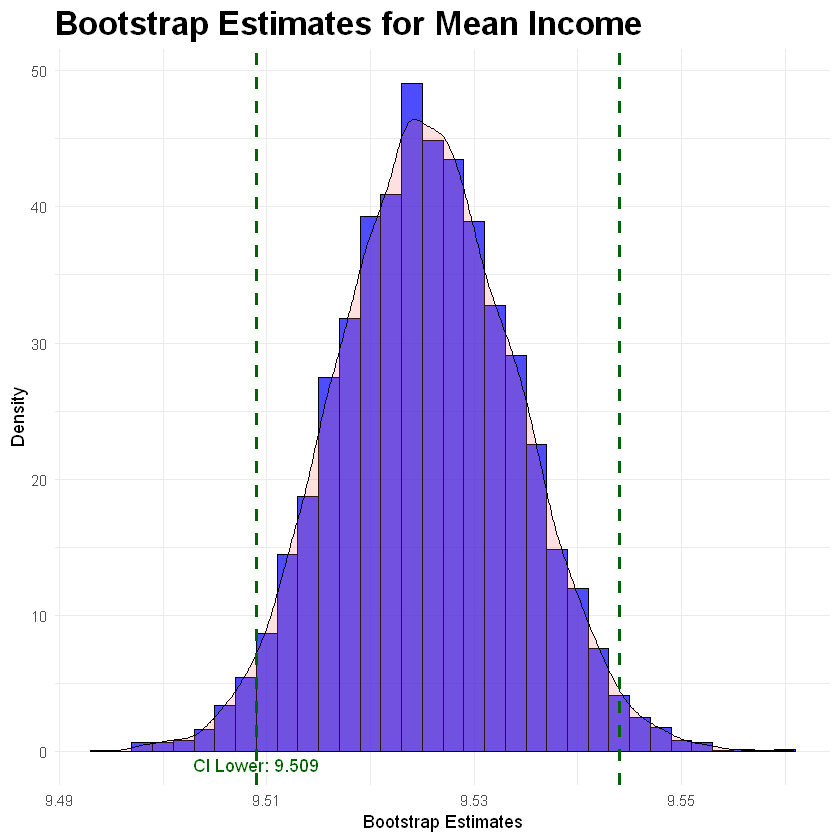

In [104]:
bootstrap_estimates <- data.frame(Estimates = boot_results$t)

# 95% confidence interval values
ci_lower <- 9.509
ci_upper <- 9.544

# Histogram with a density line and confidence interval lines
plot <- ggplot(bootstrap_estimates, aes(x = Estimates)) +
  geom_histogram(aes(y = ..density..), binwidth = 0.002, fill = "blue", color = "black", alpha = 0.7) +
  geom_density(alpha = .2, fill = "#FF6666") +
  geom_vline(xintercept = ci_lower, color = "darkgreen", linetype = "dashed", size = 1) +
  geom_vline(xintercept = ci_upper, color = "darkgreen", linetype = "dashed", size = 1) +
  labs(title = "Bootstrap Estimates for Mean Income",
       x = "Bootstrap Estimates",
       y = "Density") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        plot.subtitle = element_text(size = 18),
        plot.caption = element_text(size = 16)) +
  annotate("text", x = ci_lower, y = max(bootstrap_estimates$Density)/2, label = paste("CI Lower:", ci_lower), vjust = -1, color = "darkgreen") +
  annotate("text", x = ci_upper, y = max(bootstrap_estimates$Density)/2, label = paste("CI Upper:", ci_upper), vjust = 2, color = "darkgreen")


print(plot)


#### Interpretation from the plot:

* The sample distribution of the mean appears to be about normal based on the bell-shaped distribution of the bootstrap estimates for mean income. The Central Limit Theorem remains valid even for bootstrapped samples of size 9000.
* The confidence interval's (CI) function encapsulates the range in which most bootstrap estimates lie comes from the decline in estimate density beyond the CI.


### Mean Squared Prediction Error (MSPE), F-test

The objective is to forecast the number of automobile fatalities (log_fatal) by utilizing several socioeconomic and demographic factors in the United States. The primary objective is to comprehend the impact of several factors, including income, unemployment rate, employment/population ratio, beer tax, percentage of young drivers, and average kilometers traveled, on vehicle fatality rates.

Prediction Variable- 'fatal'.

Predictor Variables- 'income', 'unemp', 'emppopus', 'beertax', 'youngdrivers', 'miles'.


In [105]:
install.packages("car")
install.packages("corrplot")
library(ggplot2)
library(car)
library(corrplot)

Warning message:
"package 'car' is in use and will not be installed"
Warning message:
"package 'corrplot' is in use and will not be installed"


In [106]:
selected_columns <- log_cleaned_df[, c("log_fatal", "log_income", "log_unemp",
"log_emppopus", "log_beertax", "log_youngdrivers", "log_miles")]


In [107]:

set.seed(11111)
n = floor(0.8 * nrow(selected_columns)) # number corresponding to 80% of the data

index = sample(seq_len(nrow(selected_columns)), size = n) # Randomly sample indices to be included in the training set

train = selected_columns[index, ] 
test = selected_columns[-index, ] 
cat("There are", dim(train)[1], "rows and",dim(train)[2],"columns in the training set. ")
cat("There are", dim(test)[1], "rows and",dim(test)[2],"columns in the testing set.") 


There are 268 rows and 7 columns in the training set. There are 68 rows and 7 columns in the testing set.

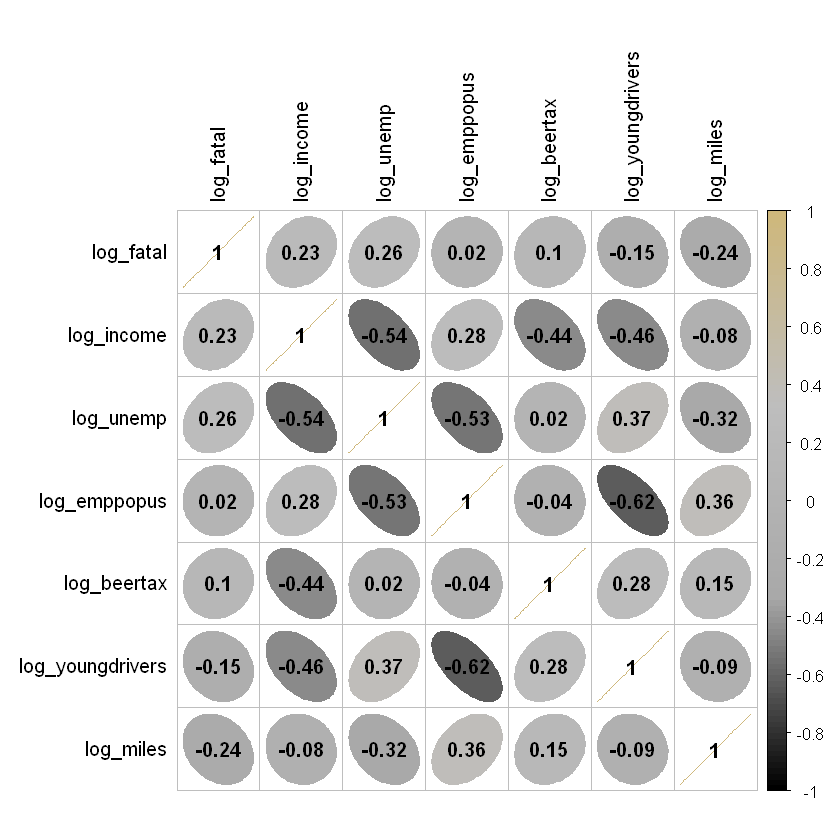

In [108]:

numeric_data <- train[sapply(train, is.numeric)]

# Compute the correlation matrix
cor_matrix <- cor(numeric_data)

col4 <- colorRampPalette(c("black", "darkgrey", "grey", "#CFB87C"))


corrplot(cor_matrix, method = "ellipse", col = col4(100), addCoef.col = "black", tl.col = "black")


In [109]:
fullModel <- lm(log_fatal ~ ., data=train)

# Backward elimination using step function
optimized_model <- step(fullModel, direction="backward", trace=FALSE, k=log(nrow(train)),
                        test="F", p.to.remove=0.05)

# Initialize a vector to keep track of MSPE at each step
mspeTracker <- numeric()

# Define a function to compute MSPE
compute_mspe <- function(fitted_model, test_data) {
  predicted_values <- predict(fitted_model, newdata=test_data)
  mean((test_data$log_fatal - predicted_values)^2)
}

# Calculate MSPE for the full model
mspeTracker <- c(mspeTracker, compute_mspe(fullModel, test))

# Backward Selection step-by-step
refinedModel <- fullModel
variables_dropped <- character()
while (TRUE) {
  current_summary <- summary(refinedModel)

  # Extract p-values and find the highest p-value below 1
  current_p_values <- coef(current_summary)[,4]
  highest_p_value <- max(current_p_values[current_p_values < 1])

  # Check if the highest p-value is below the threshold or we're down to just the intercept
  if (highest_p_value < 0.05 || length(current_p_values) == 1) {
    break
  }

  # Identify the variable associated with the highest p-value to drop
  variable_to_drop <- names(current_p_values)[which.max(current_p_values)]
  variables_dropped <- c(variables_dropped, variable_to_drop)

  # Update the model formula by removing the variable with the highest p-value
  updated_formula <- as.formula(paste(". ~ . -", variable_to_drop))
  refinedModel <- update(refinedModel, updated_formula)

  # Compute and store the MSPE for the updated model
  mspeTracker <- c(mspeTracker, compute_mspe(refinedModel, test))
  cat("Dropped variable:", variable_to_drop, "MSPE:", tail(mspeTracker, 1), "\n")
}

# Print the MSPE at each step
print(mspeTracker)
print(variables_dropped)


Dropped variable: log_youngdrivers MSPE: 0.4218161 
Dropped variable: log_miles MSPE: 0.4281197 
[1] 0.4148086 0.4218161 0.4281197
[1] "log_youngdrivers" "log_miles"       


#### Interpretation from the result:

The MSPE increased slightly with each predictors removed:

1st MSPE: 0.4148086 (Full model)

2nd MSPE: After dropping log_youngdrivers: 0.4218161

3rd MSPE: After dropping log_miles: 0.4281197

The observed pattern suggests that with each model iteration, the MSPE (prediction error) on the test set somewhat increased after eliminating a predictor (Variable).

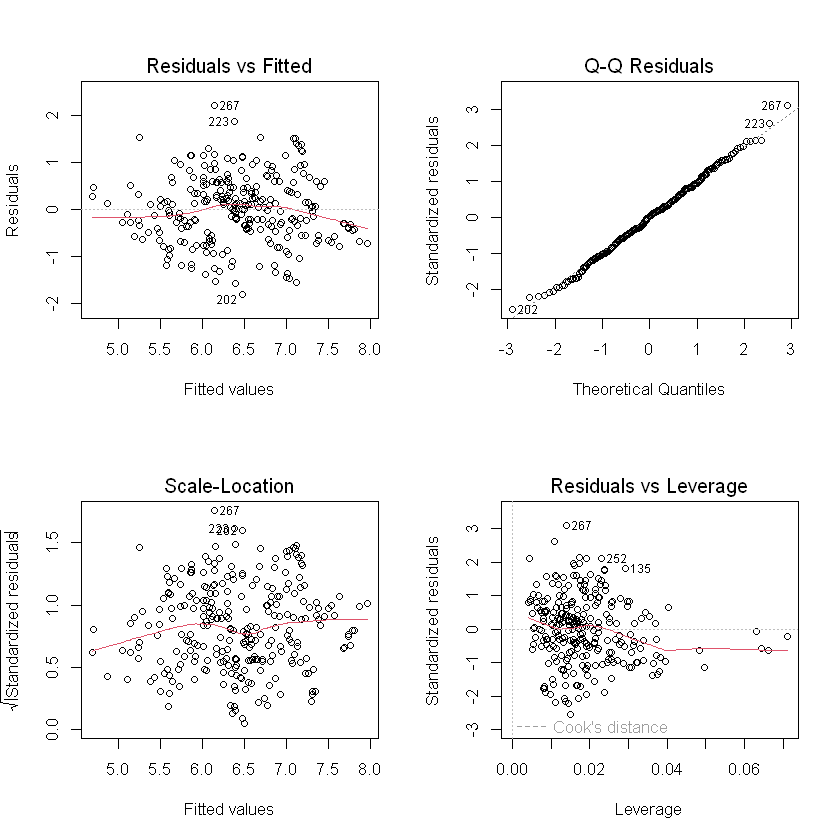

In [110]:
bestModel <- refinedModel

par(mfrow=c(2,2))
plot(bestModel)

#### Interpretation from the plot:

* Residuals vs Fitted: This is ideal for linearity because the residuals don't seem to show any regular pattern. Nevertheless, there appears to be a rise in the dispersion of residuals as the predicted values grow, indicating a potential breach of the homoscedasticity assumption.

* Q-Q Plot: The data points closely adhere to the reference line, indicating that the residuals exhibit an approximation normal distribution. The presence of outliers of the normalcy assumption is shown by the deviations observed in the tails.

* Scale-Location: It indicates that the variability of residuals is not consistent across all levels of fitted values, indicating the presence of non-homoscedasticity. Although there is no distinct pattern, the spread appears to exhibit a minor rise in correlation with the fitted values.

* Residuals vs Leverage: The majority of data points exhibit little leverage, whereas a small number of points represent notable exceptions. Cook's distance, a gauge of influence, is shown by lines in the figure. Points outside of the Cook's distance lines may have significant implications and should be investigated further. Nevertheless, there is no evidence of any data points exhibiting both high leverage and large residuals.




In [111]:

bestMSPE_Index <- which.min(mspeTracker)
bestMSPE <- mspeTracker[bestMSPE_Index]

cat("The best model based on MSPE criterion is Model", bestMSPE_Index,
    "with MSPE Value of", bestMSPE, "\n")

The best model based on MSPE criterion is Model 1 with MSPE Value of 0.4148086 


1st Model exhibits the lowest MSPE value: 0.4148 with all the predictor variables ('income', 'unemp', 'emppopus', 'beertax', 'youngdrivers', 'miles') in use.

## **Report**

**Author: Sayan Roy**

1. Introduction:

To improve road safety, it is really imperative to fully understand the underlying factors that contribute to vehicle deaths. I am driven to this topic/issue because I am fully congnizant that road fatalities are more than just numbers/ statistics; they are real, deliberate and have significant impact on populations/families. The impact of Road safety is contingent on several factors like socioeconomic, laws (Federal & State), infrastructure, etc. My case study examines are these different facets/factors really impact the road fatality rates in United States.The goal is to establish statistical basis for developing various policies to improve public health and road safety.

The dataset, obtained from supplementary materials to Stock and Watson's (2007) work and first gathered for Ruhm's (1996) influential study on alcohol legislation and road deaths, provides an observational investigation that covers many states and years. The analysis involves studying actual data that occurred in the real world. The data was collected by me in a json format and then I converted the file to csv for further analysis.

Previous studies have suggested links between economic properity, govermental actions and the outcomes of public health. These works lay the foundation for the studies, which intends to examine disparity in vehicle fatalities among economic (income) quartiles, the effects of beer taxes on the mortality rates of young drivers, and the impact of public transit networks on road deaths at the state level (urban and rural). In addition, analyzing the correlation between personal income levels and fatalities among young drivers using randomization testing, and evaluating average income estimates through bootstrapping.

2. Methods and Results:

The dataset used in this study was obtained through academic channels. It was given by my data mining professor. In data exploratory phase, thorough data cleaning has been conducted- Numerical columns with missing values (NA, NAN) underwent mean and median imputation depending on the nature of the feature and for categorical, 'Unknown' has been substituted. Additionally, the data was normalized using log transformation for skewnwss and easier to apply statistical methods.

In order to analyse the questions in hand, a set of statistical tests has been conducted. ANOVA testing was used to examine differences in mortality rates among income quartiles. T-tests were conducted to examine the impact of beer tax rates on the number of deaths among young drivers. The utilization of randomization in hypothesis testing offered negative link between personal income and fatalities among young drivers.

In addition, the application of bootstrapping methodology has confirmed the accuracy and reliability of the average income estimates. The Mean Squared Prediction Error (MSPE) and F-tests in regression analysis improved the predictive model by including the important variables such as employment ratios and demographic parameters to estimate mortality.

Results (Notes taken from the each section of my tests):
1. Hypothesis and ANOVA Testing:

Null Hypothesis (H0): State-by-state variations in the incidence of road fatalities do not exist between income quartiles.

P-value: 3.78e-06 (The exceedingly small p-value (3.78e-06), far below the threshold of 0.05, necessitates the rejection of the null hypothesis.)

2. Hypothesis and T-test:

Null Hypothesis (H0): There is no correlation between beer tax rates and the mortality rate of young drivers (ages 18 to 20).

t-statistic = -0.79204 (The computed t-value is -0.79204, indicating the direction of the mean difference - mean of the high tax group minus mean of the low tax group.)
P-value = 0.4289 (The p-value of 0.4289 above the standard alpha level of 0.05, suggesting insufficient statistical evidence to reject the null hypothesis.)

3. Hypothesis Testing:

Null Hypothesis (H0): States with lower average miles per driver (showing a lesser usage of public transportation) and higher average miles per driver do not significantly vary in their incidence of road fatalities.

The p-value is 0.001393, which falls below the standard alpha limit of 0.05. This indicates that the observed difference in means is statistically significant. Therefore, reject the null hypothesis.

4. Hypothesis with Randomization:

Null Hypothesis (H0): Among young drivers, there is no correlation between per capita personal income and vehicle fatalities (ages 15–24, using fatal1517, fatal1820, and fatal2124 variables).
The permutation test resulted in a p-value of around 0.000667. With a standard alpha level of 0.05, this p-value provides strong evidence to reject the null hypothesis.

5. Bootstraping & Confidence Interval:

This study aims to calculate the average per capita personal income within our dataset, taking into account various socioeconomic and policy-related factors that may affect vehicular fatality rates.

The BCa (Bias-Corrected and Accelerated) 95% confidence interval spans from 9.509 to 9.544. This interval is created using the bootstrap distribution and is modified to account for both bias and skewness in the bootstrap estimates.

6. MSPE and F-tests

The objective is to forecast the number of automobile fatalities (log_fatal) by utilizing several socioeconomic and demographic factors in the United States.

1st MSPE: 0.4148086 (Full model)

2nd MSPE: After dropping log_youngdrivers: 0.4218161

3rd MSPE: After dropping log_miles: 0.4281197

Conclusion:

The study was deliberate and significant in terms of socioeconomical and traffic fatalities in the country. From the extensive analysis, the ANOVA test highlighted fatality disparities among income quartiles, t-test confirmed negative correlation between beertax and martality rate, also determined no dependence inbetween number of miles and fatalities. Th study also yields a refined predictive model using MSPE & F-test which predicts fatalities using other dependent variables, bootstrap estimates supports the income distribution for large number samples as well and finally the randomization substantiated income has nothing to do with fatalities among young drivers.

The learnings would be how the various statistical findings helped in illustrating the power of data to address issue socioeconomic and public health. Moving forward, it will help policy makers to distinctively decide on the basis of outcomes.

In order to extend this research, data from multiple countries can be incorporated to test the goodness of the models, a longitudinal study would suffice to check the changes over time. Additionally, assess the effectiveness of public health campaign and the before and after decisions of policymakers.

In [ ]:
# Because of the result it took more than 2 pages